<a href="https://colab.research.google.com/github/anvicoder/Data-Science-Assignment-eCommerce-Transactions-/blob/main/Anviksha_Patel_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import gdown

# Define file IDs
customer_id = '1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
product_id = '1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transaction_id = '1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

# Download files
gdown.download(f'https://drive.google.com/uc?id={customer_id}', 'customer.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={product_id}', 'product.csv', quiet=False)
gdown.download(f'https://drive.google.com/uc?id={transaction_id}', 'transaction.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE
To: /content/customer.csv
100%|██████████| 8.54k/8.54k [00:00<00:00, 14.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0
To: /content/product.csv
100%|██████████| 4.25k/4.25k [00:00<00:00, 9.62MB/s]
Downloading...
From: https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF
To: /content/transaction.csv
100%|██████████| 54.7k/54.7k [00:00<00:00, 52.3MB/s]


'transaction.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [4]:
# Read the CSV files
customer_df = pd.read_csv('customer.csv')
product_df = pd.read_csv('product.csv')
transaction_df = pd.read_csv('transaction.csv')

# Check data
print(customer_df.head())
print(product_df.head())
print(transaction_df.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
print(customer_df.columns)
print(product_df.columns)
print(transaction_df.columns)


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [6]:
print(customer_df.info)
print(product_df.info)
print(transaction_df.info)

<bound method DataFrame.info of     CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]>
<bound method DataFrame.info of    ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronic

In [7]:
print("Customer DataFrame Summary:")
print(customer_df.describe())
print("\nProduct DataFrame Summary:")
print(product_df.describe())
print("\nTransaction DataFrame Summary:")
print(transaction_df.describe())


Customer DataFrame Summary:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Product DataFrame Summary:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Transaction DataFrame Summary:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


#Finding
1.   find missing values
2.   explore about numerical variables
3.   explore about categorical variables
4.   finding relationship between features



In [8]:
print("Customer Missing Values (%):")
print((customer_df.isnull().sum() / len(customer_df)) * 100)

print("Product Missing Values (%):")
print((product_df.isnull().sum() / len(product_df)) * 100)

print("Transaction Missing Values (%):")
print((transaction_df.isnull().sum() / len(transaction_df)) * 100)


Customer Missing Values (%):
CustomerID      0.0
CustomerName    0.0
Region          0.0
SignupDate      0.0
dtype: float64
Product Missing Values (%):
ProductID      0.0
ProductName    0.0
Category       0.0
Price          0.0
dtype: float64
Transaction Missing Values (%):
TransactionID      0.0
CustomerID         0.0
ProductID          0.0
TransactionDate    0.0
Quantity           0.0
TotalValue         0.0
Price              0.0
dtype: float64


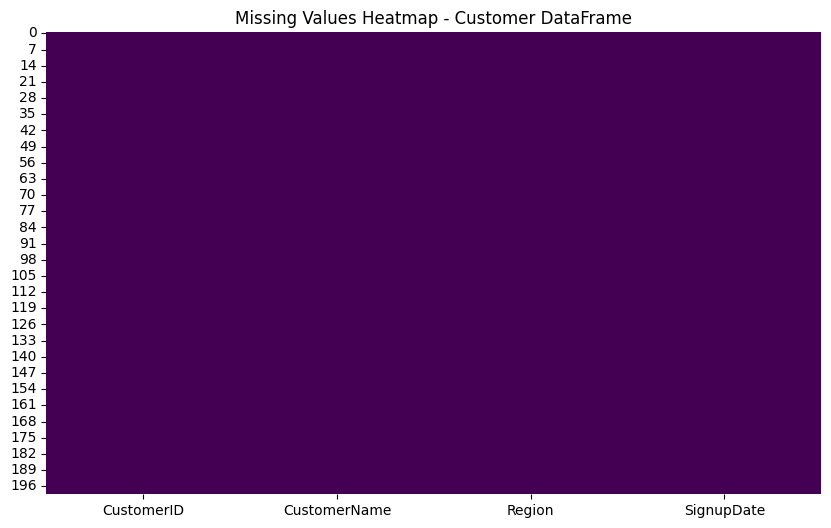

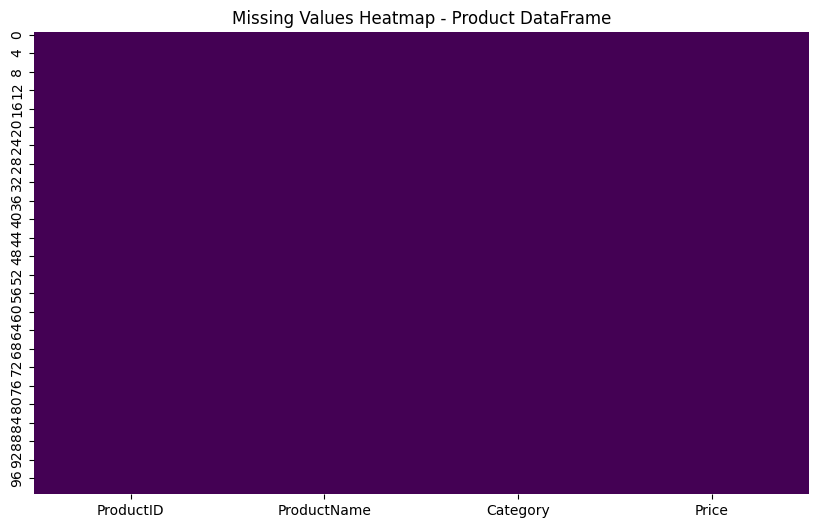

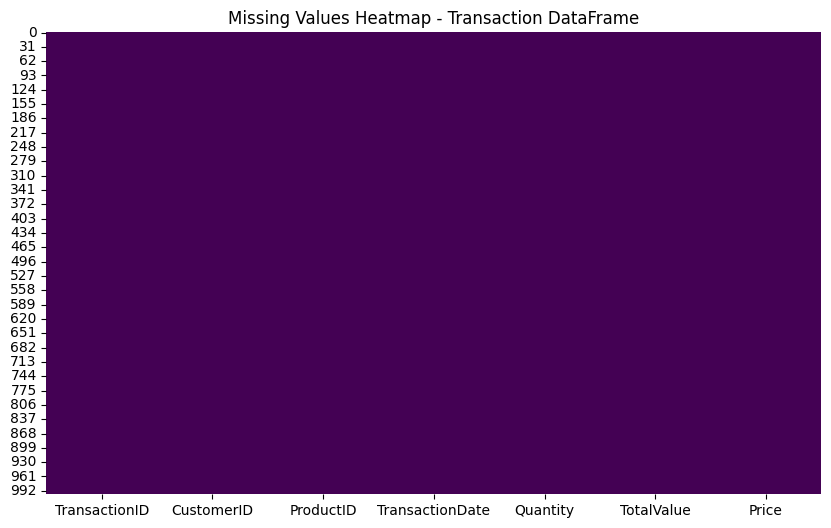

In [9]:
# Heatmap for missing values
plt.figure(figsize=(10, 6))
sns.heatmap(customer_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap - Customer DataFrame')
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(product_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap - Product DataFrame')
plt.show()
plt.figure(figsize=(10, 6))
sns.heatmap(transaction_df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap - Transaction DataFrame')
plt.show()

In [10]:


# Merge customer Id and product ID
merged_df1 = pd.merge(transaction_df, customer_df, on='CustomerID', how='left')
final_df = pd.merge(merged_df1, product_df, on='ProductID', how='left')
print(final_df.head())
print(final_df.info())
final_df.dtypes


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

,0
TransactionID,object
CustomerID,object
ProductID,object
TransactionDate,object
Quantity,int64
TotalValue,float64
Price_x,float64
CustomerName,object
Region,object
SignupDate,object


#1. Finding the customer data with highest number of transactions



In [13]:
# Count the number of transactions per customer
customer_transaction_count = final_df['CustomerID'].value_counts().reset_index()
customer_transaction_count.columns = ['CustomerID', 'TransactionCount']
customer_transaction_count = customer_transaction_count.sort_values(by='TransactionCount', ascending=False)
highest_transaction_customer = customer_transaction_count.iloc[0]
customer_details = final_df[final_df['CustomerID'] == highest_transaction_customer['CustomerID']].drop_duplicates()
print(f"CustomerID with the highest number of transactions: {highest_transaction_customer['CustomerID']}")
print(f"Customer Name: {customer_details['CustomerName'].iloc[0]}")
print(f"Number of transactions: {highest_transaction_customer['TransactionCount']}")
print("Customer's Data:")
print(customer_details)


CustomerID with the highest number of transactions: C0109
Customer Name: Abigail Jones
Number of transactions: 11
Customer's Data:
    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
15         T00093      C0109      P034  2024-08-11 04:10:13         4   
100        T00961      C0109      P095  2024-11-02 01:55:05         3   
190        T00032      C0109      P038  2024-11-07 01:47:33         4   
242        T00381      C0109      P003  2024-08-16 19:39:33         4   
403        T00283      C0109      P100  2024-07-16 14:50:07         4   
404        T00301      C0109      P100  2024-07-13 08:15:45         2   
613        T00291      C0109      P089  2024-01-27 06:14:19         2   
688        T00639      C0109      P055  2024-03-12 03:33:00         3   
786        T00935      C0109      P029  2024-09-21 09:44:39         1   
821        T00976      C0109      P019  2024-08-07 01:34:06         2   
949        T00241      C0109      P071  2024-07-08 16:06:55       

#2. Finding the highest sold product

In [18]:

product_sales = final_df.groupby('ProductID')['Quantity'].sum().reset_index()
product_sales_with_name = product_sales.merge(final_df[['ProductID', 'ProductName']].drop_duplicates(), on='ProductID', how='left')
top_selling_product = product_sales_with_name.sort_values(by='Quantity', ascending=False).iloc[0]
print(f"Product with the highest quantity sold: {top_selling_product['ProductName']}")
print(f"ProductID: {top_selling_product['ProductID']}")
print(f"Total quantity sold: {top_selling_product['Quantity']}")


Product with the highest quantity sold: SoundWave Jeans
ProductID: P059
Total quantity sold: 46


#3. Regional Customer Distribution

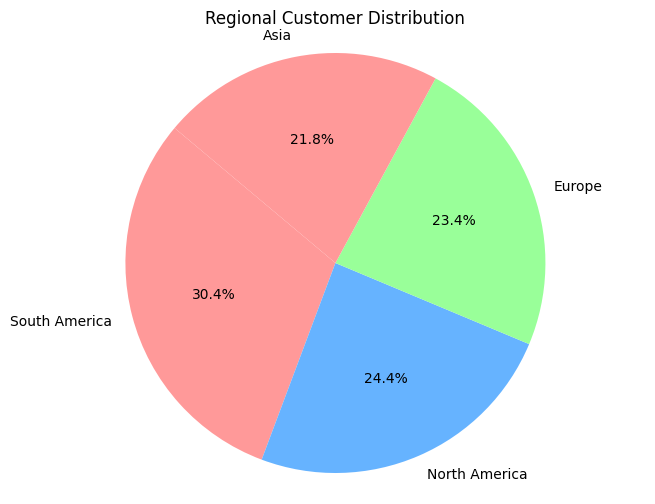

In [16]:

region_counts = final_df['Region'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Regional Customer Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

#4. Recent and the Oldest Customer

In [17]:
final_df['SignupDate'] = pd.to_datetime(final_df['SignupDate'])
most_recent_customer = final_df.loc[final_df['SignupDate'].idxmax()]
oldest_customer = final_df.loc[final_df['SignupDate'].idxmin()]
print("Most Recent Customer:")
print(most_recent_customer[['CustomerID', 'CustomerName', 'SignupDate']])
print("\nOldest Customer:")
print(oldest_customer[['CustomerID', 'CustomerName', 'SignupDate']])

Most Recent Customer:
CustomerID                    C0182
CustomerName         Joshua Preston
SignupDate      2024-12-28 00:00:00
Name: 218, dtype: object

Oldest Customer:
CustomerID                    C0118
CustomerName             Jacob Holt
SignupDate      2022-01-22 00:00:00
Name: 325, dtype: object


#5. Product Category Demand with pie chart distribution

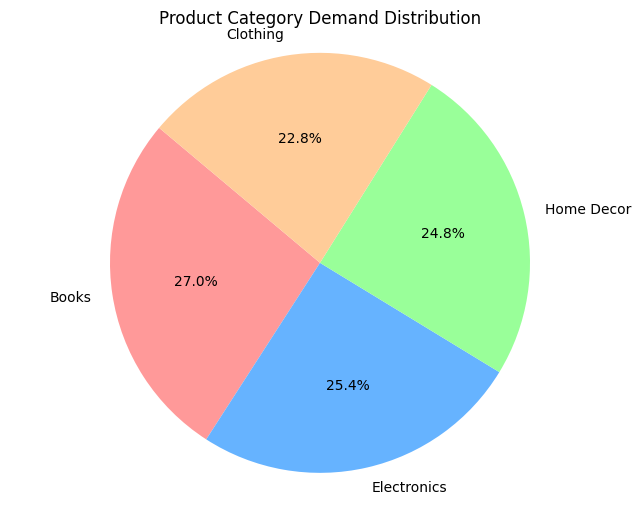

In [19]:
category_counts = final_df['Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Product Category Demand Distribution')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

#6. Revenue Contribution

Total Revenue Generated: $689,995.56


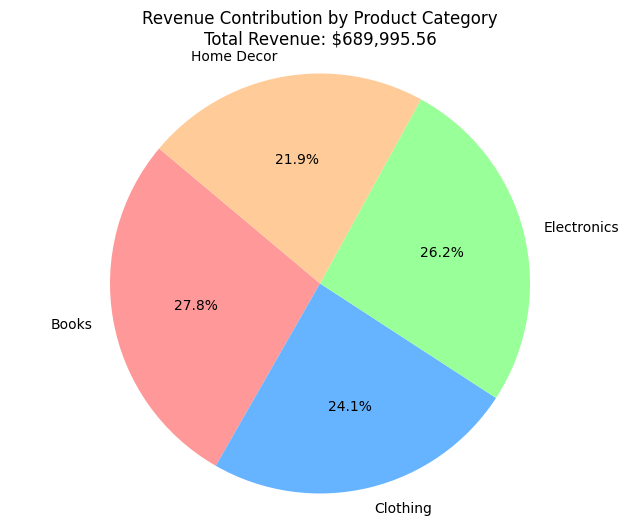

In [21]:
category_revenue = final_df.groupby('Category')['TotalValue'].sum()

# Calculate total revenue
total_revenue = category_revenue.sum()

# Print total revenue
print(f"Total Revenue Generated: ${total_revenue:,.2f}")

# Plot the pie chart for revenue contribution
plt.figure(figsize=(8, 6))
plt.pie(category_revenue, labels=category_revenue.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title(f'Revenue Contribution by Product Category\nTotal Revenue: ${total_revenue:,.2f}')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.show()

#7. Customer Lifetime Value(CLV) Analysis
Steps for CLV Analysis:
Aggregate revenue per customer.
Calculate average order value and purchase frequency.
Determine customer lifespan (e.g., months or years).
Calculate CLV using the formula:
𝐶𝐿𝑉=Average Order Value×Purchase Frequency×Customer Lifespan


In [28]:
import pandas as pd

# Convert 'TransactionDate' and 'SignupDate' to datetime format
final_df['TransactionDate'] = pd.to_datetime(final_df['TransactionDate'])
final_df['SignupDate'] = pd.to_datetime(final_df['SignupDate'])

# Step 1: Calculate total revenue per customer
customer_revenue = final_df.groupby('CustomerID')['TotalValue'].sum()

# Step 2: Calculate number of orders per customer (purchase frequency)
purchase_frequency = final_df.groupby('CustomerID')['TransactionID'].count()

# Step 3: Calculate average order value per customer
average_order_value = customer_revenue / purchase_frequency

# Step 4: Calculate customer lifespan (in years)
final_df['CustomerAge'] = (final_df['TransactionDate'].max() - final_df['SignupDate']).dt.days / 365
customer_lifespan = final_df.groupby('CustomerID')['CustomerAge'].max()

# Step 5: Calculate CLV (Customer Lifetime Value)
clv = average_order_value * purchase_frequency * customer_lifespan

# Combine all metrics into a single DataFrame
clv_df = pd.DataFrame({
    'CustomerRevenue': customer_revenue,
    'PurchaseFrequency': purchase_frequency,
    'AvgOrderValue': average_order_value,
    'CustomerLifespan': customer_lifespan,
    'CLV': clv
})

# Display results sorted by CLV in descending order
clv_df = clv_df.sort_values(by='CLV', ascending=False)

# Print the top customers by CLV
print("Top Customers by CLV:")
print(clv_df[['CLV']].head(10))

# Save CLV analysis to CSV
clv_df.to_csv('customer_lifetime_value.csv')


Top Customers by CLV:
                     CLV
CustomerID              
C0082       19917.790685
C0141       19710.105151
C0104       18962.227945
C0188       18625.813479
C0165       18268.086027
C0045       17108.511233
C0175       16793.953726
C0023       14557.286301
C0109       14492.353425
C0102       14012.022575
